In [1]:
''' 
%pip uninstall -y ruclip
%pip install transformers --upgrade
%pip install tokenizers --upgrade
%pip install peft --upgrade
%pip install accelerate --upgrade
%pip install datasets --upgrade
%pip install huggingface_hub --upgrade --force-reinstall 
%pip install Cython setuptools wheel
%pip install ruclip --force-reinstall
'''

' \n%pip uninstall -y ruclip\n%pip install transformers --upgrade\n%pip install tokenizers --upgrade\n%pip install peft --upgrade\n%pip install accelerate --upgrade\n%pip install datasets --upgrade\n%pip install huggingface_hub --upgrade --force-reinstall \n%pip install Cython setuptools wheel\n%pip install ruclip --force-reinstall\n'

In [1]:
import re
import glob


filename = "/workspace/AAA_project/venv/lib/python3.12/site-packages/ruclip/__init__.py"

with open(filename, "r", encoding="utf-8") as f:
    lines = f.readlines()

new_lines = []
for i, line in enumerate(lines):
    if i == 3 and "from huggingface_hub import" in line:
        new_lines.append("from huggingface_hub import hf_hub_url, hf_hub_download\n")
    if "cached_download(" in line:
        indent = re.match(r"^(\s*)", line).group(1)
        new_lines.append(
            indent +
            "hf_hub_download(repo_id=repo_id, filename=filename, cache_dir=cache_dir, "
            "force_filename=filename, use_auth_token=use_auth_token)\n"
        )
    if 'sberbank-ai' in line:
        new_lines.append(line.replace('sberbank-ai', 'ai-forever'))
    else:
        new_lines.append(line)

with open(filename, "w", encoding="utf-8") as f:
    f.writelines(new_lines)


for file in glob.glob("/workspace/AAA_project/venv/lib/python3.12/site-packages/**/file_download.py", recursive=True):
    with open(file, "r", encoding="utf-8") as f:
        lines = f.readlines()
    new_lines = []
    i = 0
    while i < len(lines):
        line = lines[i]
        match = re.match(r"^(\s*)if\s+etag\s+is\s+None\s*:", line)
        if match:
            indent = match.group(1)
            new_lines.append(f"{indent}if etag is None:\n")
            new_lines.append(f"{indent}    etag = None  # PATCH: skip ETag check for ruclip\n")
            i += 1
            while i < len(lines):
                if not lines[i].startswith(indent + "    ") and lines[i].strip():
                    break
                i += 1
            continue
        else:
            new_lines.append(line)
            i += 1
    with open(file, "w", encoding="utf-8") as f:
        f.writelines(new_lines)
    print("Блок if etag is None заменён на безопасный патч в:", file)


print('\n\n ПЕРЕЗАПУСТИТЬ ЯДРО!\n\n')

Блок if etag is None заменён на безопасный патч в: /workspace/AAA_project/venv/lib/python3.12/site-packages/huggingface_hub/file_download.py


 ПЕРЕЗАПУСТИТЬ ЯДРО!




In [2]:
import ruclip
import torch
from PIL import Image
import pandas as pd
from tqdm import tqdm
import ast

import os

import numpy as np
import cv2
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import matplotlib.patches as patches
import random

import torch
from PIL import Image

DEVICE = "cuda" 

DATASET = '/workspace/AAA_project/data/main_dataset/meta_info.csv'
IMAGES = '/workspace/AAA_project/data/main_dataset/images/'

RANDOM_STATE = 42

In [4]:
df = pd.read_csv(DATASET)

In [5]:
def load_images_from_row(images_str):
    try:
        ids = ast.literal_eval(images_str) if isinstance(images_str, str) else []
        images = []
        for img_id in ids:
            img_path = os.path.join(IMAGES, f"{img_id}.jpg")
            if os.path.isfile(img_path):
                try:
                    images.append(Image.open(img_path).convert('RGB'))
                except Exception as e:
                    print(f'Ошибка открытия {img_path}: {e}')
                    images.append(None)
            else:
                images.append(None)
        return images
    except Exception as e:
        print(f'Ошибка парсинга {images_str}: {e}')
        return []


test_images = load_images_from_row(df.iloc[4]['images'])
print(test_images)

[<PIL.Image.Image image mode=RGB size=360x480 at 0x755BC8451A30>, <PIL.Image.Image image mode=RGB size=360x480 at 0x755BC85FD130>, <PIL.Image.Image image mode=RGB size=360x480 at 0x755BC65F8620>]


In [6]:
df

,item_id,title,description,attrs,images,category,other
0,1322715250286,Туфли Kapika р.30,Новые туфельки для девочки\n\nТМ Kapika \n\nВе...,"{'Вид одежды': 'Для девочек', 'Предмет одежды'...",[14797484977],(Ж) Обувь,"Туфли Kapika для девочек, размер 30 (19 см), в..."
1,1855325000254,Кеды adidas superstar детские,"Продаю кеды адидас, оригинал, покупались в офл...","{'Предмет одежды': 'Обувь', 'Вид одежды': 'Для...","[29690495353, 29690495386, 29690495401, 296904...",(М) Обувь,Продаю детские кеды adidas Superstar белого цв...
2,1779415000905,Кросовки 27 размер для девочки,Кросовки для девочки от Загадка в хорошем сост...,"{'Вид одежды': 'Для девочек', 'Предмет одежды'...","[27889651299, 27889651322, 27889651235, 278896...",(Ж) Обувь,"Яркие разноцветные кроссовки для девочки, разм..."
3,1817738751606,Crocs сабо детские35-36/3-5 оригинал,"Состояние отличное, дефект единственный на фот...","{'Вид одежды': 'Для девочек', 'Предмет одежды'...","[28909766974, 28909767030, 28909767120, 289097...",(Ж) Обувь,Продаются оригинальные детские сабо Crocs в яр...
4,1863482000525,Ботинки детские Tombi 26 размер,"Ботиночки Tombi,в стиле Timberland,очень удобн...","{'Предмет одежды': 'Обувь', 'Вид одежды': 'Для...","[29898615047, 29898615057, 29898615186]",(М) Обувь,"Продаются детские ботинки Tombi 26 размера, ко..."
...,...,...,...,...,...,...,...
37436,1663653000236,Кофточки 122,Кофточки для школы.\nЧерная с жемчугом и синяя...,"{'Вид одежды': 'Для девочек', 'Предмет одежды'...","[29413588886, 29413589167]",(Ж) Блузки и рубашки,Продаю стильные кофточки для девочек от бренда...
37437,1670162501379,Футболка и толстовка для мальчика 152см,Вещи пакетом на мальчика. На рост 152см. Вещи ...,"{'Предмет одежды': 'Футболки и майки', 'Вид од...","[26299714558, 29298404644, 29307635580, 293076...",(М) Футболки и майки,Продаю комплект одежды для мальчика на рост 15...
37438,1676625251053,Хлопковая фланелевая рубашка hm 68,Новая хлопковая фланелевая рубашка H&M 🇩🇪\n\nC...,"{'Предмет одежды': 'Рубашки', 'Вид одежды': 'Д...","[25538038858, 25538039948]",(М) Рубашки,Новая хлопковая фланелевая рубашка H&M для мал...
37439,1320192252110,Рубашка для мальчика 140,Рубашка голубого цвета длина рукава 51 ширина ...,"{'Предмет одежды': 'Рубашки', 'Вид одежды': 'Д...",[14744548373],(М) Рубашки,Продаётся новая голубая рубашка для мальчика. ...


### Поиск главной картинки в объявлении

In [7]:
def make_full_text(row):
    parts = []
    if 'title' in row and pd.notnull(row['title']):
        parts.append(str(row['title']))
    if 'description' in row and pd.notnull(row['description']):
        parts.append(str(row['description']))
    if 'category' in row and pd.notnull(row['category']):
        parts.append(f"Категория: {row['category']}")
    if 'attrs' in row and pd.notnull(row['attrs']):
        if isinstance(row['attrs'], dict):
            attrs_str = ', '.join([f"{k}: {v}" for k, v in row['attrs'].items()])
        else:
            try:
                attrs_dict = ast.literal_eval(row['attrs'])
                attrs_str = ', '.join([f"{k}: {v}" for k, v in attrs_dict.items()])
            except Exception:
                attrs_str = str(row['attrs'])
        parts.append(f"Атрибуты: {attrs_str}")
    return " | ".join(parts)

make_full_text(df.iloc[4])


'Ботинки детские Tombi 26 размер | Ботиночки Tombi,в стиле Timberland,очень удобные ,комфортные и тёплые.Отличный вариант на осень ,внутри байка.Ребенок надел один раз ,состояние идеальное | Категория: (М) Обувь | Атрибуты: Предмет одежды: Обувь, Вид одежды: Для мальчиков, Вид объявления: Продаю своё, Цвет: Коричневый, Размер: 26 (16,5 см), Бренд одежды: Tombi, Вид обуви: Ботинки и туфли, Тип обуви: Ботинки, Как часто надевали?: Один раз'

In [8]:
def select_main_image(row, predictor):
    images = load_images_from_row(row['images'])
    images = [img for img in images if img is not None]
    if not images:
        return None
    if len(images) == 1:
        try:
            image_ids = ast.literal_eval(row['images'])
        except Exception:
            image_ids = row['images']
        return image_ids[0] if isinstance(image_ids, list) else None
    text = make_full_text(row)
    with torch.no_grad():
        text_latents = predictor.get_text_latents([text])  # shape [1, dim]
        image_latents = predictor.get_image_latents(images)  # shape [N, dim]

        sims = (image_latents @ text_latents.T).squeeze(1)  # shape [N]
        idx = int(sims.argmax().item())
        try:
            image_ids = ast.literal_eval(row['images'])
        except Exception:
            image_ids = row['images']
        if isinstance(image_ids, list) and len(image_ids) > idx:
            return image_ids[idx]
        else:
            return None


In [9]:
# 'ruclip-vit-base-patch32-224'
# 'ruclip-vit-base-patch16-224'
# 'ruclip-vit-large-patch14-224'
# 'ruclip-vit-large-patch14-336'
# 'ruclip-vit-base-patch32-384'
# 'ruclip-vit-base-patch16-384'


clip, processor = ruclip.load('ruclip-vit-base-patch32-384', device=DEVICE)
predictor = ruclip.Predictor(clip, processor, DEVICE)

In [10]:
tqdm.pandas(desc="Выбор главной картинки")

df_samp = df.sample(300, random_state=RANDOM_STATE)
df_samp['main_img'] = df_samp.progress_apply(lambda row: select_main_image(row, predictor), axis=1)
# df['main_img'] = df.progress_apply(lambda row: select_main_image(row, predictor), axis=1)

Выбор главной картинки:   0%|          | 0/300 [00:00<?, ?it/s]

2it [00:00, 17.10it/s]
2it [00:00, 119.67it/s]
4it [00:00, 136.70it/s]
4it [00:00, 176.70it/s]
3it [00:00, 156.76it/s]
3it [00:00, 169.48it/s]
2it [00:00, 154.00it/s]
2it [00:00, 150.83it/s]
3it [00:00, 167.78it/s]
5it [00:00, 98.93it/s]
3it [00:00, 63.08it/s]
3it [00:00, 58.52it/s]
4it [00:00, 74.63it/s]
4it [00:00, 197.81it/s]
2it [00:00, 151.52it/s]
2it [00:00, 143.71it/s]
4it [00:00, 78.01it/s]
3it [00:00, 65.09it/s]
3it [00:00, 186.09it/s]
4it [00:00, 173.98it/s]
2it [00:00, 144.64it/s]
3it [00:00, 132.10it/s]
5it [00:00, 94.19it/s]
3it [00:00, 145.88it/s]
3it [00:00, 89.13it/s]
3it [00:00, 69.12it/s]
5it [00:00, 90.73it/s]
5it [00:00, 108.78it/s]
4it [00:00, 91.57it/s]
2it [00:00, 124.65it/s]
5it [00:00, 107.13it/s]
4it [00:00, 82.67it/s]
4it [00:00, 187.25it/s]
5it [00:00, 201.13it/s]
2it [00:00, 119.65it/s]
2it [00:00, 143.58it/s]
5it [00:00, 83.57it/s]
3it [00:00, 64.29it/s]
3it [00:00, 60.79it/s]
2it [00:00, 138.66it/s]
3it [00:00, 181.29it/s]
4it [00:00, 168.85it/s]
3it [00:

In [11]:
df_samp

,item_id,title,description,attrs,images,category,other,main_img
36733,1863865000337,Рубашка в клетку размер 110,Рубашка в клетку для мальчика размер 110. Сост...,"{'Предмет одежды': 'Рубашки', 'Вид одежды': 'Д...","[29903535170, 29903535184]",(М) Рубашки,"Стильная рубашка в клетку для мальчика, размер...",29903535170
18270,1857660501263,Школьные брюки для мальчика 122,Продам школьные брюки для мальчика на рост 122...,"{'Предмет одежды': 'Брюки', 'Вид одежды': 'Брю...","[29764433546, 29764433222]",(М) Брюки,Продаются школьные брюки для мальчика на рост ...,29764433546
17751,1850913500620,Лосины foxy 98,"В отличном состоянии, дочка носила на физкульт...","{'Вид одежды': 'Лосины и леггинсы', 'Предмет о...",[29571160438],(Ж) Брюки,"Лосины FOX для детей 3 лет, размер 98 см. Элас...",29571160438
3100,1852602751239,Бутсы футбольные Nike р-р 36,Футбольные бутсы для подростка Nike Mercurial....,"{'Предмет одежды': 'Обувь', 'Вид одежды': 'Для...","[29625738907, 29625738844, 29625738906, 296257...",(М) Обувь,Футбольные бутсы Nike Mercurial в ярком красно...,29625738844
25990,1761584250583,"Футболка на физкультуру новая, Лицей 1, рост 152","новая футболка на физкультуру, даже не открыва...","{'Предмет одежды': 'Футболки и майки', 'Вид од...","[29501057068, 29501057116, 29501057107, 295010...",(М) Футболки и майки,"Новая зелёная футболка для мальчиков, идеально...",29501057068
...,...,...,...,...,...,...,...,...
19734,1721043500935,Вельветовые теплые брюки для девочки 110,Новые вельветовые теплые брюки- бананы для дев...,"{'Вид одежды': 'Брюки', 'Предмет одежды': 'Брю...",[26682905622],(Ж) Брюки,"Новые вельветовые брюки для девочки, размер 11...",26682905622
22413,1720588751054,Кардиган Dior для девочки 68-74,"Размер указан 6М, мы носили до полутора лет , ...","{'Вид одежды': 'Кофты', 'Предмет одежды': 'Сви...","[26666649080, 26666829392, 26666830633]",(Ж) Свитеры и толстовки,Очаровательный кардиган для девочки от Christi...,26666649080
5100,1854980750028,Детский зимний комбинезонн на девочку 104 размер,"очень хороший зимний костюмчик на 4 года, разм...","{'Вид одежды': 'Утеплённые комбинезоны', 'Пред...","[29680546407, 29680546340, 29680546401, 296805...",(Ж) Комбинезоны,Продаётся детский зимний комбинезон для девочк...,29680546402
37139,1848501250471,Mayoral футболка 152,Красивая и эффектная футболка фирмы Mayoral. ...,"{'Вид одежды': 'Футболки', 'Предмет одежды': '...","[29502978693, 29502979290, 29502979985]",(Ж) Футболки и топы,Стильная синяя футболка Mayoral для детей рост...,29502979985



--- Объявление 1 (index=3780) ---
Title: Комбинезон
Description: Продаю детский комбинезон весна/осень размер 56-62. НОВЫЙ! одевали 1 раз всего. На погоду от +15 до 0. Ручки открываются/закрываются. Подкладка хлопковый трикотаж. Утеплитель бамбуковое волокно. Водоотталкивающая ткань.
Category: (Ж) Комбинезоны
Attrs: {'Вид одежды': 'Утеплённые комбинезоны', 'Предмет одежды': 'Комбинезоны', 'Состояние': 'Б/у', 'Вид объявления': 'Продаю своё', 'Цвет': 'Серый', 'Размер. Одежда': '56 см (2 мес.)', 'Бренд одежды': 'Другой', 'Тип предмета одежды': 'Верх, Низ'}


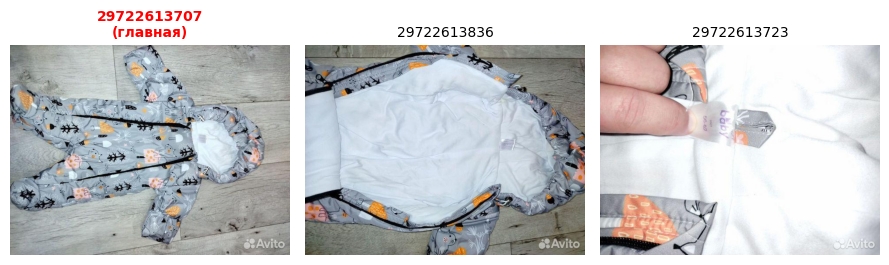


--- Объявление 2 (index=1174) ---
Title: Кроссовки Fila на 35 размер
Description: Продаю кроссовки Fila на 35 размер. Состояние хорошее. Посмотреть можно в районе Горького, Сельма, Светлогорск, Пионерский.
Category: (Ж) Обувь
Attrs: {'Вид одежды': 'Для девочек', 'Предмет одежды': 'Обувь', 'Вид объявления': 'Продаю своё', 'Размер': '35 (22,5 см)', 'Бренд одежды': 'Fila', 'Вид обуви': 'Кроссовки и кеды'}


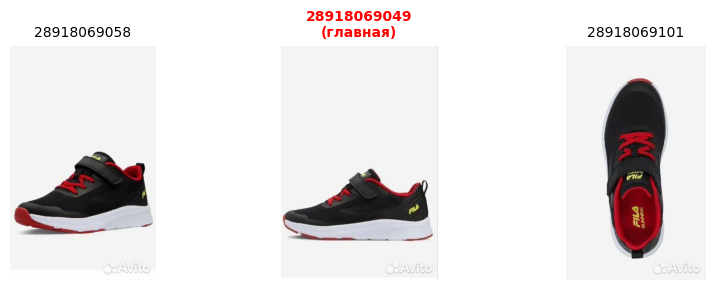


--- Объявление 3 (index=8310) ---
Title: Ветровка на мальчика
Description: Продам ветровку на мальчика рост 120-125см. В хорошем состоянии, без потертостей. Длина ветровки  53см, рукав от плеча 43 см.
Category: (М) Верхняя одежда
Attrs: {'Предмет одежды': 'Верхняя одежда', 'Вид одежды': 'Куртки и пуховики', 'Вид объявления': 'Продаю своё', 'Цвет': 'Зелёный', 'Размер. Одежда': '122 см (7 лет)', 'Бренд одежды': 'Oldos', 'Материал': 'Хлопок', 'Тип предмета одежды': 'Верх', 'Тип одежды': 'Ветровка', 'Как часто надевали?': 'Несколько раз'}


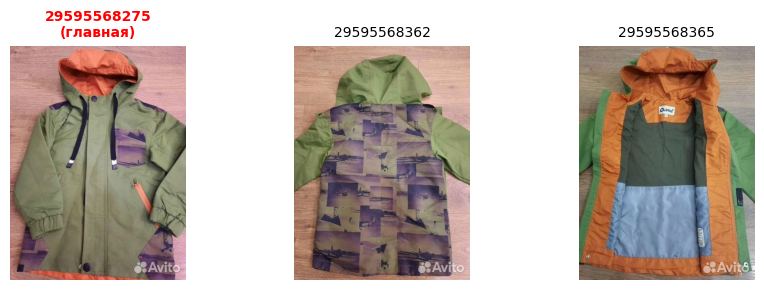


--- Объявление 4 (index=28102) ---
Title: Рубашка белая
Description: продам белую рубашку, одевали 1 раз, на первое сентября, качество хорошее, не мнётся рост 140-146, 600 руб
Category: (М) Рубашки
Attrs: {'Предмет одежды': 'Рубашки', 'Вид одежды': 'Для мальчиков', 'Состояние': 'Б/у', 'Вид объявления': 'Продаю своё', 'Цвет': 'Белый', 'Размер. Одежда': '140 см (10 лет)', 'Бренд одежды': 'Другой', 'Тип предмета одежды': 'Верх'}


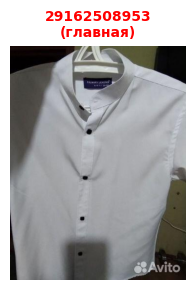


--- Объявление 5 (index=10853) ---
Title: Платье, кофты 116-122 р
Description: хорошее состояние, дырочек нет, три платья с рукавами по 150 р. , кофта платье  хлопок, очень приятная к телу 200 р. 116 р., бежевая кофта с укороченными рукавами очень стильно смотрится, быстро переросли не носили практически 116 р. 200 р, всё вместе за 700 р.
Category: (Ж) Платья и юбки
Attrs: {'Вид одежды': 'Платья', 'Предмет одежды': 'Платья и юбки', 'Состояние': 'Б/у', 'Вид объявления': 'Продаю своё', 'Размер. Одежда': '116 см (6 лет)', 'Бренд одежды': 'Другой', 'Тип предмета одежды': 'Верх, Низ'}


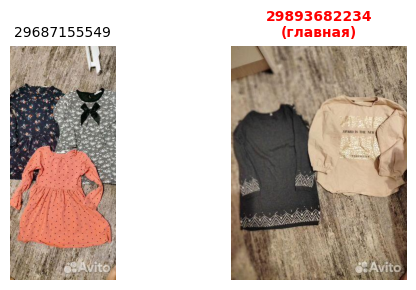

In [12]:
def show_ads(df, images_folder, k=5, random_state=42):
    random.seed(random_state)
    sample_indices = random.sample(list(df.index), k)
    
    for i, idx in enumerate(sample_indices):
        row = df.loc[idx]
        print(f"\n--- Объявление {i+1} (index={idx}) ---")
        if 'title' in row and pd.notnull(row['title']):
            print(f"Title: {row['title']}")
        if 'description' in row and pd.notnull(row['description']):
            print(f"Description: {row['description']}")
        if 'category' in row and pd.notnull(row['category']):
            print(f"Category: {row['category']}")
        if 'attrs' in row and pd.notnull(row['attrs']):
            print(f"Attrs: {row['attrs']}")

        try:
            image_ids = ast.literal_eval(row['images'])
        except Exception:
            image_ids = row['images']
        main_img_id = row['main_img']
        images = []
        for img_id in image_ids:
            img_path = os.path.join(images_folder, f"{img_id}.jpg")
            if os.path.isfile(img_path):
                try:
                    images.append(Image.open(img_path).convert('RGB'))
                except Exception:
                    images.append(None)
            else:
                images.append(None)
        n_imgs = len(images)

        fig, axs = plt.subplots(1, n_imgs, figsize=(3 * n_imgs, 3))
        if n_imgs == 1:
            axs = [axs]
        for j, (ax, img, img_id) in enumerate(zip(axs, images, image_ids)):
            ax.axis('off')
            if img is not None:
                ax.imshow(img)

            if img_id == main_img_id:
                ax.set_title(f"{img_id}\n(главная)", color='red', fontsize=10, fontweight='bold')
            else:
                ax.set_title(str(img_id), color='black', fontsize=10)
        plt.tight_layout()
        plt.show()


show_ads(df_samp, IMAGES, k=5, random_state=42)

In [ ]:
df['main_img'] = df.progress_apply(lambda row: select_main_image(row, predictor), axis=1)

df.to_csv('meta_info_with_main_img.csv', index=False)

In [3]:
class_prompts = {
    'один товар': [
        "На картинке только один товар",
        "Несколько штук одного товара",
        "На фото один товар",
        "Изображён один предмет",
        "Только один объект на фотографии",
        "В объявлении продаётся один товар"
    ],
    'много товаров': [
        "На картинке много разных товаров",
        "Изображено несколько разных вещей",
        "Товары в ассортименте",
        "Много разных товаров на фото",
        "Это набор предметов",
        "Видно много разных товаров"
    ],
    'непонятно': [
        "Нельзя определить разнообразие предметов",
        "Один это предмет или много разных, очень сложно понять",
        "На фото сложно однозначно определить разнообразие товаров",
        "Невозможно понять, сколько товаров на картинке"
    ]
}

classes = list(class_prompts.keys())
all_prompts = []
class_idxs = []
for i, cls in enumerate(classes):
    for p in class_prompts[cls]:
        all_prompts.append(p)
        class_idxs.append(i)

In [8]:
def classify_main_img(img, predictor, all_prompts, class_idxs, num_classes):
    with torch.no_grad():
        text_latents = predictor.get_text_latents(all_prompts)  # [N_prompts, D]
        # усредняем вектор по каждому классу
        text_latents_per_class = []
        for i in range(num_classes):
            idxs = [j for j, ci in enumerate(class_idxs) if ci == i]
            text_latents_per_class.append(text_latents[idxs].mean(dim=0))
        text_latents_per_class = torch.stack(text_latents_per_class, dim=0)  # [num_classes, D]
        img_latent = predictor.get_image_latents([img])[0]
        scores = (text_latents_per_class @ img_latent)
        idx = int(scores.argmax().item())
        probs = torch.nn.functional.softmax(scores, dim=0).cpu().numpy()
        return classes[idx], probs


def classify_ads_with_clip(df, images_folder, predictor, all_prompts, class_idxs, classes):
    labels = []
    probs_all = []
    for i, row in tqdm(df.iterrows(), total=len(df)):
        main_img_id = row['main_img']
        img_path = os.path.join(images_folder, f"{main_img_id}.jpg")
        if not os.path.isfile(img_path):
            labels.append('непонятно')
            probs_all.append([0, 0, 1])
            continue
        try:
            img = Image.open(img_path).convert('RGB')
            label, probs = classify_main_img(img, predictor, all_prompts, class_idxs, len(classes))
            labels.append(label)
            probs_all.append(probs)
        except Exception as e:
            labels.append('непонятно')
            probs_all.append([0, 0, 1])

    return labels, probs_all


df = pd.read_csv('meta_info_with_main_img.csv')

clip, processor = ruclip.load('ruclip-vit-base-patch32-384', device=DEVICE)
predictor = ruclip.Predictor(clip, processor, DEVICE)

In [9]:
n_parts = 5
part_size = len(df) // n_parts

for i in range(n_parts):
    start = i * part_size
    end = (i + 1) * part_size if i < n_parts - 1 else len(df)
    part = df.iloc[start:end].copy()

    labels, probs = classify_ads_with_clip(part, IMAGES, predictor, all_prompts, class_idxs, classes)
    part['label'] = labels
    part[['prob_один', 'prob_много', 'prob_непонятно']] = pd.DataFrame(probs, index=part.index)

    part.to_csv(f'df_part_{i+1}_processed.csv', index=False)
    print(f'Часть {i+1} обработана и сохранена.')

  0%|          | 0/7488 [00:00<?, ?it/s]

1it [00:00, 105.86it/s]
1it [00:00, 108.39it/s]
1it [00:00, 105.94it/s]
1it [00:00, 107.64it/s]
1it [00:00, 108.82it/s]
1it [00:00, 94.88it/s]
1it [00:00, 101.48it/s]
1it [00:00, 100.38it/s]
1it [00:00, 104.94it/s]
1it [00:00, 94.81it/s]
1it [00:00, 92.42it/s]
1it [00:00, 88.56it/s]
1it [00:00, 93.26it/s]
1it [00:00, 104.98it/s]
1it [00:00, 105.26it/s]
1it [00:00, 94.25it/s]
1it [00:00, 104.50it/s]
1it [00:00, 104.33it/s]
1it [00:00, 106.12it/s]
1it [00:00, 109.22it/s]
1it [00:00, 107.39it/s]
1it [00:00, 106.66it/s]
1it [00:00, 107.06it/s]
1it [00:00, 106.75it/s]
1it [00:00, 95.90it/s]
1it [00:00, 99.75it/s]
1it [00:00, 100.27it/s]
1it [00:00, 101.29it/s]
1it [00:00, 105.45it/s]
1it [00:00, 98.59it/s]
1it [00:00, 108.06it/s]
1it [00:00, 108.03it/s]
1it [00:00, 97.18it/s]
1it [00:00, 104.40it/s]
1it [00:00, 103.52it/s]
1it [00:00, 113.88it/s]
1it [00:00, 95.17it/s]
1it [00:00, 108.67it/s]
1it [00:00, 93.86it/s]
1it [00:00, 101.37it/s]
1it [00:00, 100.04it/s]
1it [00:00, 94.55it/s]
1it [

Часть 1 обработана и сохранена.


  0%|          | 0/7488 [00:00<?, ?it/s]

1it [00:00, 91.47it/s]
1it [00:00, 18.01it/s]
1it [00:00, 103.59it/s]
1it [00:00, 99.71it/s]
1it [00:00, 92.65it/s]
1it [00:00, 98.83it/s]
1it [00:00, 106.93it/s]
1it [00:00, 96.31it/s]
1it [00:00, 101.89it/s]
1it [00:00, 58.38it/s]
1it [00:00, 97.95it/s]
1it [00:00, 102.70it/s]
1it [00:00, 66.11it/s]
1it [00:00, 112.03it/s]
1it [00:00, 109.13it/s]
1it [00:00, 114.32it/s]
1it [00:00, 97.84it/s]
1it [00:00, 95.71it/s]
1it [00:00, 103.70it/s]
1it [00:00, 98.28it/s]
1it [00:00, 102.64it/s]
1it [00:00, 107.35it/s]
1it [00:00, 106.65it/s]
1it [00:00, 106.58it/s]
1it [00:00, 106.28it/s]
1it [00:00, 110.23it/s]
1it [00:00, 109.20it/s]
1it [00:00, 100.47it/s]
1it [00:00, 102.62it/s]
1it [00:00, 100.05it/s]
1it [00:00, 43.31it/s]
1it [00:00, 96.79it/s]
1it [00:00, 91.42it/s]
1it [00:00, 95.01it/s]
1it [00:00, 106.64it/s]
1it [00:00, 17.01it/s]
1it [00:00, 102.70it/s]
1it [00:00, 103.85it/s]
1it [00:00, 90.30it/s]
1it [00:00, 99.46it/s]
1it [00:00, 100.41it/s]
1it [00:00, 10.36it/s]
1it [00:00, 

Часть 2 обработана и сохранена.


  0%|          | 0/7488 [00:00<?, ?it/s]

1it [00:00, 16.10it/s]
1it [00:00, 107.96it/s]
1it [00:00, 98.56it/s]
1it [00:00, 102.59it/s]
1it [00:00, 106.13it/s]
1it [00:00, 108.10it/s]
1it [00:00, 94.94it/s]
1it [00:00, 101.96it/s]
1it [00:00, 110.08it/s]
1it [00:00, 94.33it/s]
1it [00:00, 93.75it/s]
1it [00:00, 104.19it/s]
1it [00:00, 32.37it/s]
1it [00:00, 97.51it/s]
1it [00:00, 94.50it/s]
1it [00:00, 79.73it/s]
1it [00:00, 87.97it/s]
1it [00:00, 101.27it/s]
1it [00:00, 103.16it/s]
1it [00:00, 95.11it/s]
1it [00:00, 100.65it/s]
1it [00:00, 103.29it/s]
1it [00:00, 94.89it/s]
1it [00:00, 101.54it/s]
1it [00:00, 101.72it/s]
1it [00:00, 91.49it/s]
1it [00:00, 98.51it/s]
1it [00:00, 102.43it/s]
1it [00:00, 94.79it/s]
1it [00:00, 102.73it/s]
1it [00:00, 106.62it/s]
1it [00:00, 104.49it/s]
1it [00:00, 94.23it/s]
1it [00:00, 100.20it/s]
1it [00:00, 106.01it/s]
1it [00:00, 105.40it/s]
1it [00:00, 101.23it/s]
1it [00:00, 106.17it/s]
1it [00:00, 110.08it/s]
1it [00:00, 105.28it/s]
1it [00:00, 92.07it/s]
1it [00:00, 103.69it/s]
1it [00:0

Часть 3 обработана и сохранена.


  0%|          | 0/7488 [00:00<?, ?it/s]

1it [00:00, 98.07it/s]
1it [00:00, 100.71it/s]
1it [00:00, 91.43it/s]
1it [00:00, 102.36it/s]
1it [00:00, 91.42it/s]
1it [00:00, 100.18it/s]
1it [00:00, 101.35it/s]
1it [00:00, 105.82it/s]
1it [00:00, 90.01it/s]
1it [00:00, 100.97it/s]
1it [00:00, 91.84it/s]
1it [00:00, 99.86it/s]
1it [00:00, 99.88it/s]
1it [00:00, 101.09it/s]
1it [00:00, 101.93it/s]
1it [00:00, 105.42it/s]
1it [00:00, 102.23it/s]
1it [00:00, 96.89it/s]
1it [00:00, 101.81it/s]
1it [00:00, 105.36it/s]
1it [00:00, 102.12it/s]
1it [00:00, 91.68it/s]
1it [00:00, 106.03it/s]
1it [00:00, 104.56it/s]
1it [00:00, 99.81it/s]
1it [00:00, 101.45it/s]
1it [00:00, 104.45it/s]
1it [00:00, 98.52it/s]
1it [00:00, 100.94it/s]
1it [00:00, 96.21it/s]
1it [00:00, 95.83it/s]
1it [00:00, 102.32it/s]
1it [00:00, 103.19it/s]
1it [00:00, 94.68it/s]
1it [00:00, 101.13it/s]
1it [00:00, 101.37it/s]
1it [00:00, 99.66it/s]
1it [00:00, 101.47it/s]
1it [00:00, 100.98it/s]
1it [00:00, 99.17it/s]
1it [00:00, 92.01it/s]
1it [00:00, 98.14it/s]
1it [00:00

Часть 4 обработана и сохранена.


  0%|          | 0/7489 [00:00<?, ?it/s]

1it [00:00, 103.47it/s]
1it [00:00, 99.83it/s]
1it [00:00, 95.96it/s]
1it [00:00, 99.69it/s]
1it [00:00, 88.37it/s]
1it [00:00, 93.35it/s]
1it [00:00, 102.35it/s]
1it [00:00, 99.97it/s]
1it [00:00, 102.28it/s]
1it [00:00, 100.29it/s]
1it [00:00, 100.76it/s]
1it [00:00, 100.98it/s]
1it [00:00, 99.93it/s]
1it [00:00, 101.59it/s]
1it [00:00, 99.89it/s]
1it [00:00, 97.52it/s]
1it [00:00, 99.02it/s]
1it [00:00, 104.16it/s]
1it [00:00, 104.03it/s]
1it [00:00, 102.78it/s]
1it [00:00, 102.39it/s]
1it [00:00, 97.74it/s]
1it [00:00, 101.30it/s]
1it [00:00, 102.81it/s]
1it [00:00, 99.84it/s]
1it [00:00, 108.54it/s]
1it [00:00, 98.54it/s]
1it [00:00, 118.94it/s]
1it [00:00, 103.28it/s]
1it [00:00, 100.86it/s]
1it [00:00, 101.15it/s]
1it [00:00, 89.76it/s]
1it [00:00, 94.39it/s]
1it [00:00, 93.24it/s]
1it [00:00, 94.69it/s]
1it [00:00, 100.21it/s]
1it [00:00, 100.24it/s]
1it [00:00, 102.73it/s]
1it [00:00, 94.14it/s]
1it [00:00, 101.51it/s]
1it [00:00, 100.96it/s]
1it [00:00, 103.25it/s]
1it [00:00

Часть 5 обработана и сохранена.


In [11]:
dfs = [pd.read_csv(f'df_part_{i+1}_processed.csv') for i in range(5)]
df_combined = pd.concat(dfs, ignore_index=True)
print(df_combined['label'].value_counts(normalize=True).sort_index())

label
много товаров    0.140007
непонятно        0.034534
один товар       0.825459
Name: proportion, dtype: float64


In [12]:
class_multi = df_combined['label'].value_counts().sort_index()['много товаров']
class_single = df_combined['label'].value_counts().sort_index()['один товар']

df_combined[['item_id', 
    'title', 
    'description', 
    'attrs', 
    'images', 
    'category', 
    'other', 
    'main_img']].to_csv(f'MULTI-{class_multi}-SINGLE-{class_single}-UNKNOWN-{len(df) - class_multi - class_single}.csv',
                        index=False)

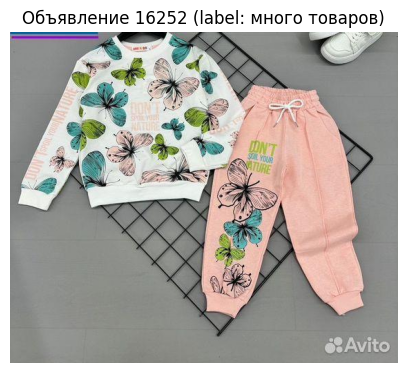

Объявление 16252 (label: много товаров)
Текст описания: 👌Скидка 5% при покупке от 2-х вещей из аккаунта

Клaссныйи костюм толстoвка и штaны .

✅Толcтовкa /cвитшот с рисунком.

✅Штaны в поясе на резинке +дoп утяжкa.

ткaнь : трикoтaж.


Paзмep:98, 104,110,116,122.

Ценa: 800 pуб.


🚚Aвито доcтавка (Пoчта, боксбepи, Яндекс,СДЭК, 5Pоst)

Авитo × Ехmаil - Hе отпpавляю!

🏃‍♀️Вcтpeча Жулебино и М.О. Томилино‼

🏠Магазина для примерки нет!



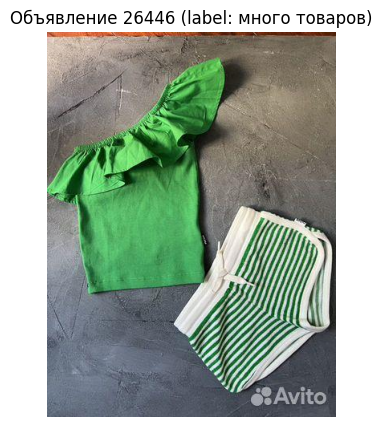

Объявление 26446 (label: много товаров)
Текст описания: Летний комплект Моло, шорты пляжные и топ с одним плечом Rebecca, продается вместе.

в идеальном состоянии


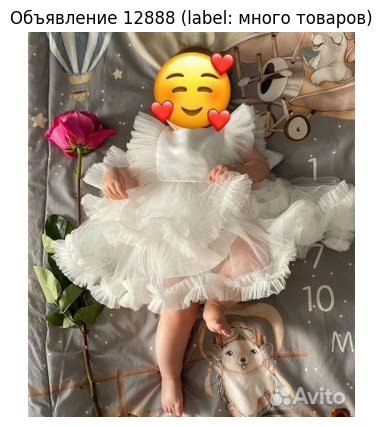

Объявление 12888 (label: много товаров)
Текст описания: Платье принцессы с фатиновой юбкой
Надевали один раз для фотосессии, состояние отличное, постирано детским средством


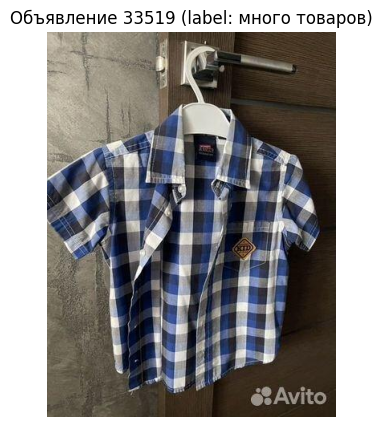

Объявление 33519 (label: много товаров)
Текст описания: Продам 3 рубашки в идеальном состоянии, требуется только глажка)) Фирма hm. Подойдёт от 3х до 6ти лет


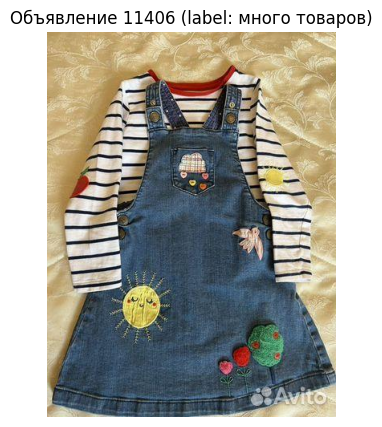

Объявление 11406 (label: много товаров)
Текст описания: Комплект  Mothercare, размер 3-4 года, идеально на рост 98-104 см, носили не часто, состояние очень хорошее. Цена 800 руб


In [15]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

sample_df = df_combined[df_combined['label'] == 'много товаров'].sample(5, random_state=RANDOM_STATE)

for i, row in enumerate(sample_df.iterrows()):
    idx, row = row[0], row[1]
    main_img_id = row['main_img']
    img_path = os.path.join(IMAGES, f"{main_img_id}.jpg")
    if not os.path.isfile(img_path):
        continue
    try:
        img = Image.open(img_path).convert('RGB')
        plt.figure(figsize=(5, 5))
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Объявление {idx} (label: {row['label']})", fontsize=12)
        plt.show()
    except Exception as e:
        print(f'Ошибка открытия {img_path}: {e}')
    print(f'Объявление {idx} (label: {row["label"]})')
    print(f'Текст описания: {row["description"]}')